# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [82]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [4]:
sinasc_raw[['TPMETESTIM']]

,TPMETESTIM
0,8.0
1,8.0
2,8.0
3,8.0
4,8.0
...,...
27023,8.0
27024,2.0
27025,1.0
27026,2.0


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [26]:
sinasc = sinasc_raw[['munResArea', 'munResAlt']]

In [6]:
faixa = pd.cut(sinasc_raw['munResLat'], [-20, -10.5, 0], labels=['Acima de -10,5', 'Abaixo de -10,5'])
sinasc.groupby(faixa).aggregate(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

munResArea                                               \
                          sum          mean      min        max     median   
munResLat                                                                    
Acima de -10,5   8.360143e+07   6434.344207  459.978  24855.724   5067.384   
Abaixo de -10,5  3.137711e+08  22357.926110  965.676  34096.394  34096.394   

                                             munResAlt                     \
                          std           var        sum        mean    min   
munResLat                                                                   
Acima de -10,5    5688.822159  3.236270e+07  3310445.0  254.786808  133.0   
Abaixo de -10,5  14488.909375  2.099285e+08  1530415.0  109.050520   85.0   

                                                         
                   max median         std           var  
munResLat                                                
Acima de -10,5   595.0  191.0  139.771518  19536.077237  
Abaixo de -10,5  192.0   87.0   30.071422    904.290400

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [7]:
sinasc_2 = sinasc_raw[['QTDFILMORT', 'SEMAGESTAC']]

In [8]:
faixa = pd.cut(sinasc_raw['munResArea'], [0, 3000, 40000], labels=['Abaixo de 3 mil km', 'Acima de 3 mil km'])
sinasc_2.groupby(faixa).aggregate(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

QTDFILMORT                                                  \
                          sum      mean  min   max median       std       var   
munResArea                                                                      
Abaixo de 3 mil km     1260.0  0.244803  0.0   4.0    0.0  0.551215  0.303838   
Acima de 3 mil km      5383.0  0.272116  0.0  28.0    0.0  0.629081  0.395743   

                   SEMAGESTAC                                          \
                          sum       mean   min   max median       std   
munResArea                                                              
Abaixo de 3 mil km   197469.0  38.470485  21.0  45.0   39.0  1.874927   
Acima de 3 mil km    797147.0  38.591547  19.0  45.0   39.0  2.049838   

                              
                         var  
munResArea                    
Abaixo de 3 mil km  3.515350  
Acima de 3 mil km   4.201834

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [9]:
sinasc_3 = sinasc_raw[['TPDOCRESP', 'STTRABPART']]
sinasc_raw['munResAlt'].value_counts()

87.0     8437
157.0    2182
139.0    1729
595.0    1590
177.0    1374
227.0     927
163.0     881
186.0     784
133.0     781
263.0     687
252.0     631
153.0     583
144.0     500
151.0     432
191.0     417
338.0     367
85.0      337
178.0     304
166.0     303
259.0     261
145.0     233
128.0     226
419.0     214
111.0     205
182.0     205
155.0     199
197.0     170
206.0     166
212.0     164
340.0     162
397.0     154
269.0     127
202.0     112
99.0      109
241.0     104
265.0      99
230.0      98
192.0      97
158.0      93
266.0      84
154.0      81
236.0      80
161.0      75
270.0      54
124.0      50
296.0      44
245.0      43
170.0      40
215.0      32
Name: munResAlt, dtype: int64

In [10]:
faixa = pd.cut(sinasc_raw['munResAlt'], [0, 100, 400, 600], labels=['Até 100 metros de altitude', 'Até 400 metros de altitude', 'Acima de 400 metros de altitude'])
sinasc_3.groupby(faixa).aggregate(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

TPDOCRESP                             \
                                      sum      mean  min  max median   
munResAlt                                                              
Até 100 metros de altitude        29407.0  3.310481  0.0  5.0    3.0   
Até 400 metros de altitude        50446.0  3.089918  0.0  5.0    3.0   
Acima de 400 metros de altitude     994.0  0.550998  0.0  5.0    0.0   

                                                    STTRABPART                 \
                                      std       var        sum      mean  min   
munResAlt                                                                       
Até 100 metros de altitude       0.816384  0.666482    16007.0  1.967429  1.0   
Até 400 metros de altitude       1.010633  1.021378    32136.0  1.990338  1.0   
Acima de 400 metros de altitude  1.233276  1.520970     3631.0  2.019466  1.0   

                                                                 
                                 max median       std       var  
munResAlt                                                        
Até 100 metros de altitude       9.0    2.0  0.772003  0.595989  
Até 400 metros de altitude       9.0    2.0  0.542210  0.293991  
Acima de 400 metros de altitude  9.0    2.0  0.796598  0.634568

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [11]:
regioes = {
    # Região de Porto Velho
    'Candeias do Jamari': 'Porto Velho',
    'Guajará-Mirim': 'Porto Velho',
    'Itapuã do Oeste': 'Porto Velho',
    'Nova Mamoré': 'Porto Velho',
    'Porto Velho': 'Porto Velho',

    # Região de Ariquemes
    'Alto Paraíso': 'Ariquemes',
    'Ariquemes': 'Ariquemes',
    'Buritis': 'Ariquemes',
    'Cacaulândia': 'Ariquemes',
    'Campo Novo de Rondônia': 'Ariquemes',
    'Cujubim': 'Ariquemes',
    'Monte Negro': 'Ariquemes',
    'Rio Crespo': 'Ariquemes',

    # Região de Jaru
    'Governador Jorge Teixeira': 'Jaru',
    'Jaru': 'Jaru',
    "Machadinho d'Oeste": 'Jaru',
    'Theobroma': 'Jaru',
    'Vale do Anari': 'Jaru',

    # Região de Ji-Paraná
    "Alvorada d'Oeste": 'Ji-Paraná',
    'Costa Marques': 'Ji-Paraná',
    'Ji-Paraná': 'Ji-Paraná',
    'Mirante da Serra': 'Ji-Paraná',
    'Nova União': 'Ji-Paraná',
    'Ouro Preto do Oeste': 'Ji-Paraná',
    'Presidente Médici': 'Ji-Paraná',
    'São Francisco do Guaporé': 'Ji-Paraná',
    'São Miguel do Guaporé': 'Ji-Paraná',
    'Seringueiras': 'Ji-Paraná',
    'Teixeirópolis': 'Ji-Paraná',
    'Urupá': 'Ji-Paraná',
    'Vale do Paraíso': 'Ji-Paraná',

    # Região de Cacoal
    "Alta Floresta d'Oeste": 'Cacoal',
    'Alto Alegre dos Parecis': 'Cacoal',
    'Cacoal': 'Cacoal',
    'Castanheiras': 'Cacoal',
    "Espigão d'Oeste": 'Cacoal',
    'Ministro Andreazza': 'Cacoal',
    "Nova Brasilândia d'Oeste": 'Cacoal',
    'Novo Horizonte do Oeste': 'Cacoal',
    'Parecis': 'Cacoal',
    'Pimenta Bueno': 'Cacoal',
    'Primavera de Rondônia': 'Cacoal',
    'Rolim de Moura': 'Cacoal',
    "Santa Luzia d'Oeste": 'Cacoal',
    "São Felipe d'Oeste": 'Cacoal',

    # Região de Vilhena
    	'Cabixi': 'Vilhena',
      'Cerejeiras': 'Vilhena',
      'Chupinguaia': 'Vilhena',
      'Colorado do Oeste': 'Vilhena',
      'Corumbiara': 'Vilhena',
      'Pimenteiras do Oeste': 'Vilhena',
      'Vilhena': 'Vilhena',
}

In [83]:
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC']).dt.strftime("%B")

In [84]:
sinasc_raw = sinasc_raw.set_index(['munResNome'])
sinasc_raw

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
munResNome,,,,,,,,,,,,,,,,,,,,,
Alta Floresta D'Oeste,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,0,5,1,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alta Floresta D'Oeste,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,1,5,2,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alta Floresta D'Oeste,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,1,5,3,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alto Alegre dos Parecis,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,0,4,4,ATIVO,MUNIC,Rondônia,-12.13178,-61.85308,397.0,3958.273
Alta Floresta D'Oeste,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,1,5,5,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vilhena,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,1,5,2767632,ATIVO,MUNIC,Rondônia,-12.74137,-60.13858,595.0,11518.915
Chupinguaia,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,0,5,2772678,ATIVO,MUNIC,Rondônia,-12.55684,-60.90185,340.0,5126.723
Vilhena,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,1,5,2776905,ATIVO,MUNIC,Rondônia,-12.74137,-60.13858,595.0,11518.915


In [85]:
sinasc_ = sinasc_raw.groupby([regioes, 'DTNASC']).mean(numeric_only=True)
sinasc_

ORIGEM      CODESTAB     CODMUNNASC   LOCNASC  \
munResNome DTNASC                                                     
Ariquemes  April         1.0  3.306660e+06  110015.975352  1.021127   
           August        1.0  3.290572e+06  110015.457692  1.000000   
           December      1.0  3.064160e+06  110012.128631  1.029046   
           February      1.0  3.088631e+06  110055.354701  1.000000   
           January       1.0  3.352119e+06  110780.541985  1.000000   
...                      ...           ...            ...       ...   
Vilhena    March         1.0  2.771487e+06  111807.991111  1.013333   
           May           1.0  2.823023e+06  113974.443350  1.034483   
           November      1.0  2.823992e+06  119210.238532  1.009174   
           October       1.0  2.813838e+06  117209.878924  1.026906   
           September     1.0  2.821570e+06  116382.952381  1.021164   

                       IDADEMAE  ESTCIVMAE     CODOCUPMAE  QTDFILVIVO  \
munResNome DTNASC                                                       
Ariquemes  April      25.411972   2.931900  831266.642336    1.138462   
           August     25.684615   2.461240  824058.294355    1.008403   
           December   24.821577   2.730769  839561.734783    1.066079   
           February   25.316239   2.594714  829076.340708    1.139535   
           January    24.866412   2.789062  826084.923077    0.992063   
...                         ...        ...            ...         ...   
Vilhena    March      26.386667   1.764444  744740.267943    0.973094   
           May        25.586207   1.631841  734578.322404    0.944444   
           November   26.169725   1.816514  770745.171717    0.935484   
           October    26.161435   1.717489  738354.230769    0.882883   
           September  26.407407   1.797872  730296.057803    0.989418   

                      QTDFILMORT      CODMUNRES  ...  STDNNOVA  CODPAISRES  \
munResNome DTNASC                                ...                         
Ariquemes  April        0.254167  110030.130282  ...  1.000000         1.0   
           August       0.300971  110032.784615  ...  0.996154         1.0   
           December     0.363184  110030.348548  ...  1.000000         1.0   
           February     0.325581  110032.837607  ...  1.000000         1.0   
           January      0.212000  110029.835878  ...  1.000000         1.0   
...                          ...            ...  ...       ...         ...   
Vilhena    March        0.283784  110032.302222  ...  1.000000         1.0   
           May          0.303030  110028.871921  ...  1.000000         1.0   
           November     0.211982  110029.876147  ...  1.000000         1.0   
           October      0.357466  110025.860987  ...  1.000000         1.0   
           September    0.216931  110026.608466  ...  1.000000         1.0   

                      TPROBSON  PARIDADE  KOTELCHUCK      CONTADOR  munResLat  \
munResNome DTNASC                                                               
Ariquemes  April      3.950704  0.676056    4.654930  4.139430e+03  -9.961286   
           August     3.953846  0.673077    4.719231  1.484367e+06  -9.991091   
           December   3.858921  0.672199    4.626556  1.484316e+06  -9.988554   
           February   4.307692  0.679487    4.521368  3.156090e+03  -9.943157   
           January    3.862595  0.606870    4.473282  5.903630e+03  -9.981531   
...                        ...       ...         ...           ...        ...   
Vilhena    March      4.088889  0.644444    4.373333  1.761455e+04 -12.845223   
           May        4.231527  0.635468    4.246305  2.529973e+04 -12.861575   
           November   4.224771  0.619266    4.417431  1.520887e+06 -12.875611   
           October    4.147982  0.659193    4.529148  1.514413e+06 -12.874706   
           September  4.375661  0.634921    4.433862  1.511709e+06 -12.868104   

                      munResLon   munResAlt   munResArea  
munResNome DTNASC   

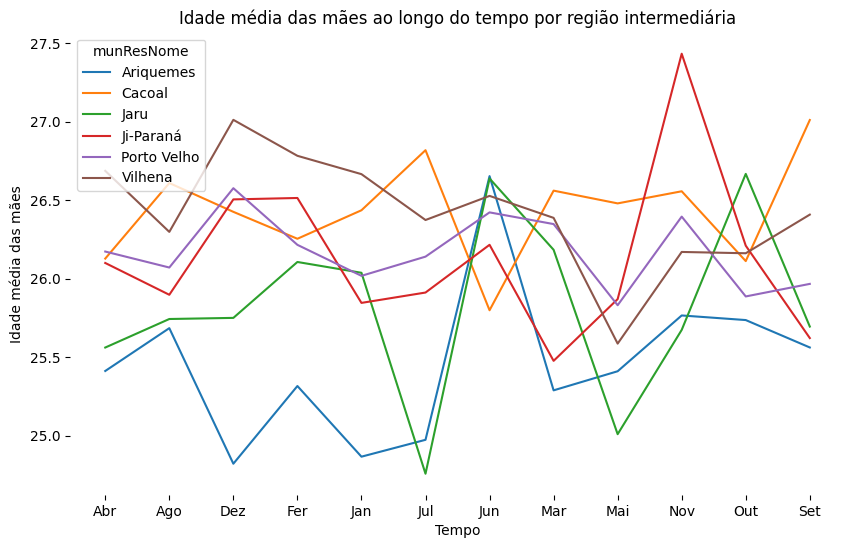

In [178]:
fig = sns.lineplot(data=sinasc_, y='IDADEMAE', x='DTNASC', hue='munResNome', sort=False)
fig.figure.set_size_inches(10, 6)
plt.title('Idade média das mães ao longo do tempo por região intermediária')
plt.xlabel('Tempo')
plt.ylabel('Idade média das mães')
plt.xticks(fig.get_xticks(), ['Abr', 'Ago', 'Dez', 'Fer', 'Jan', 'Jul', 'Jun', 'Mar', 'Mai', 'Nov', 'Out', 'Set'])
sns.despine(left=True, bottom=True)

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


In [244]:
dados_roraima = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin-1')
dados_roraima

,municipio,regiao,idh,ifdm,pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
4,Ariquemes,Ariquemes,0.702,0.7746,2579830
5,Buritis,Ariquemes,0.616,0.6199,726000
6,Cabixi,Vilhena,0.650,0.5887,113031
7,Cacaulândia,Ariquemes,0.646,0.5721,116635
8,Cacoal,Cacoal,0.718,0.7111,2261644
9,Campo Novo de Rondônia,Ariquemes,0.593,0.5272,208821


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [241]:
dados_roraima.loc[(dados_roraima['idh'] >= 0.800), 'class_idh'] = 'IDH muito alto'
dados_roraima.loc[(dados_roraima['idh'] >= 0.700) & (dados_roraima['idh'] <= 0.799) , 'class_idh'] = 'IDH alto'
dados_roraima.loc[(dados_roraima['idh'] >= 0.600) & (dados_roraima['idh'] <= 0.699) , 'class_idh'] = 'IDH médio'
dados_roraima.loc[(dados_roraima['idh'] >= 0.500) & (dados_roraima['idh'] <= 0.599) , 'class_idh'] = 'IDH baixo'
dados_roraima.loc[(dados_roraima['idh'] <= 0.499), 'class_idh'] = 'IDH muito baixo'

In [242]:
dados_roraima = dados_roraima.set_index('class_idh')
dados_roraima

,municipio,regiao,idh,ifdm,pib
class_idh,,,,,
IDH médio,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
IDH baixo,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
IDH médio,Alto Paraíso,Ariquemes,0.625,0.5735,358000
IDH médio,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
IDH alto,Ariquemes,Ariquemes,0.702,0.7746,2579830
IDH médio,Buritis,Ariquemes,0.616,0.6199,726000
IDH médio,Cabixi,Vilhena,0.650,0.5887,113031
IDH médio,Cacaulândia,Ariquemes,0.646,0.5721,116635
IDH alto,Cacoal,Cacoal,0.718,0.7111,2261644


In [243]:
dados_roraima.groupby('class_idh').aggregate({'idh': ['min', 'mean', 'max'], 'ifdm': ['min', 'mean', 'max'], 'pib': ['min', 'mean', 'sum', 'max']})

idh                     ifdm                        pib  \
             min      mean    max     min      mean     max      min   
class_idh                                                              
IDH alto   0.700  0.715857  0.736  0.6785  0.726629  0.7746  1164877   
IDH baixo  0.584  0.591333  0.598  0.4562  0.532156  0.5922    92346   
IDH médio  0.607  0.643250  0.692  0.5055  0.604097  0.6850    52908   

                                             
                   mean       sum       max  
class_idh                                    
IDH alto   4.545286e+06  31817002  17912070  
IDH baixo  2.488713e+05   2239842    633000  
IDH médio  3.244894e+05  11681619   1500890

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [245]:
dados_roraima.loc[(dados_roraima['ifdm'] >= 0.800), 'class_ifdm'] = 'IFDM alto'
dados_roraima.loc[(dados_roraima['ifdm'] >= 0.600) & (dados_roraima['ifdm'] < 0.800) , 'class_ifdm'] = 'IFDM moderado'
dados_roraima.loc[(dados_roraima['ifdm'] >= 0.400) & (dados_roraima['ifdm'] < 0.600) , 'class_ifdm'] = 'IFDM regular'
dados_roraima.loc[(dados_roraima['ifdm'] < 0.400), 'class_ifdm'] = 'IFDM baixo'

In [246]:
dados_roraima = dados_roraima.set_index('class_ifdm')
dados_roraima

,municipio,regiao,idh,ifdm,pib
class_ifdm,,,,,
IFDM moderado,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
IFDM regular,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
IFDM regular,Alto Paraíso,Ariquemes,0.625,0.5735,358000
IFDM regular,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
IFDM moderado,Ariquemes,Ariquemes,0.702,0.7746,2579830
IFDM moderado,Buritis,Ariquemes,0.616,0.6199,726000
IFDM regular,Cabixi,Vilhena,0.650,0.5887,113031
IFDM regular,Cacaulândia,Ariquemes,0.646,0.5721,116635
IFDM moderado,Cacoal,Cacoal,0.718,0.7111,2261644


In [247]:
dados_roraima.groupby('class_ifdm').aggregate({'idh': ['min', 'mean', 'max'], 'ifdm': ['min', 'mean', 'max'], 'pib': ['min', 'mean', 'sum', 'max']})

idh                     ifdm                      pib  \
                 min      mean    max     min      mean     max    min   
class_ifdm                                                               
IFDM moderado  0.607  0.667885  0.736  0.6006  0.659919  0.7746  52908   
IFDM regular   0.584  0.620192  0.672  0.4562  0.556362  0.5973  59779   

                                                 
                       mean       sum       max  
class_ifdm                                       
IFDM moderado  1.508813e+06  39229143  17912070  
IFDM regular   2.503585e+05   6509320    893000

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [255]:
dados_roraima.loc[(dados_roraima['pib'] >= 10 ** 6), 'class_pib'] = 'Acima de 1 Bilhão'
dados_roraima.loc[(dados_roraima['pib'] >= 5 * 10 ** 5) & (dados_roraima['pib'] < 10 ** 6) , 'class_pib'] = 'Acima de 500 Milhões'
dados_roraima.loc[(dados_roraima['pib'] >= 3 * 10 ** 5) & (dados_roraima['pib'] < 5 * 10 ** 5) , 'class_pib'] = 'Acima de 300 Milhões'
dados_roraima.loc[(dados_roraima['pib'] >= 2 * 10 ** 5) & (dados_roraima['pib'] < 3 * 10 ** 5), 'class_pib'] = 'Acima de 200 Milhões'
dados_roraima.loc[(dados_roraima['pib'] >= 10 ** 5) & (dados_roraima['pib'] < 2 * 10 ** 5) , 'class_pib'] = 'Acima de 100 Milhões'
dados_roraima.loc[(dados_roraima['pib'] < 10 ** 5) , 'class_pib'] = 'Até 100 Milhões'

In [256]:
dados_roraima = dados_roraima.set_index('class_pib')
dados_roraima

,municipio,regiao,idh,ifdm,pib
class_pib,,,,,
Acima de 300 Milhões,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
Acima de 200 Milhões,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
Acima de 300 Milhões,Alto Paraíso,Ariquemes,0.625,0.5735,358000
Acima de 200 Milhões,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
Acima de 1 Bilhão,Ariquemes,Ariquemes,0.702,0.7746,2579830
Acima de 500 Milhões,Buritis,Ariquemes,0.616,0.6199,726000
Acima de 100 Milhões,Cabixi,Vilhena,0.650,0.5887,113031
Acima de 100 Milhões,Cacaulândia,Ariquemes,0.646,0.5721,116635
Acima de 1 Bilhão,Cacoal,Cacoal,0.718,0.7111,2261644


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [322]:
sinasc_raw.index.name = 'municipio'

In [323]:
sinasc_class = sinasc_raw.merge(dados_roraima, on='municipio', how='left')

In [324]:
sinasc_class = sinasc_class.groupby('municipio').mean(numeric_only=True)

In [325]:
sinasc_class.loc[(sinasc_class['idh'] >= 0.800), 'class_idh'] = 'IDH muito alto'
sinasc_class.loc[(sinasc_class['idh'] >= 0.700) & (sinasc_class['idh'] <= 0.799) , 'class_idh'] = 'IDH alto'
sinasc_class.loc[(sinasc_class['idh'] >= 0.600) & (sinasc_class['idh'] <= 0.699) , 'class_idh'] = 'IDH médio'
sinasc_class.loc[(sinasc_class['idh'] >= 0.500) & (sinasc_class['idh'] <= 0.599) , 'class_idh'] = 'IDH baixo'
sinasc_class.loc[(sinasc_class['idh'] <= 0.499), 'class_idh'] = 'IDH muito baixo'

In [326]:
sinasc_class

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,...,KOTELCHUCK,CONTADOR,munResLat,munResLon,munResAlt,munResArea,idh,ifdm,pib,class_idh
municipio,,,,,,,,,,,,,,,,,,,,,
Alta Floresta D'Oeste,1.0,2.682512e+06,110602.370572,1.016349,25.991826,2.631579,738935.930159,0.856354,0.201102,110001.0,...,4.686649,713575.294278,-11.93554,-61.99982,338.0,7067.025,0.641,0.6337,496000.0,IDH médio
Alto Alegre dos Parecis,1.0,2.594052e+06,110024.084416,1.000000,24.844156,2.509934,762729.349315,0.907895,0.181208,110037.0,...,4.824675,653387.357143,-12.13178,-61.85308,397.0,3958.273,0.592,0.5046,213410.0,IDH baixo
Alto Paraíso,1.0,2.821486e+06,110006.340708,1.008850,24.960177,2.533632,855455.454128,1.162896,0.248848,110040.0,...,4.871681,709518.123894,-9.71667,-63.31763,128.0,2651.822,0.625,0.5735,358000.0,IDH médio
Alvorada D'Oeste,1.0,2.884708e+06,110022.795122,1.000000,25.770732,2.834171,773363.721053,0.975248,0.183168,110034.0,...,4.673171,787478.000000,-11.34413,-62.27727,182.0,3029.189,0.643,0.5919,204098.0,IDH médio
Ariquemes,1.0,2.630108e+06,110145.201851,1.008676,25.607866,2.710247,855151.830598,0.962253,0.243448,110002.0,...,4.661076,750004.316368,-9.90846,-63.03327,139.0,4426.571,0.702,0.7746,2579830.0,IDH alto
Buritis,1.0,4.928684e+06,110041.852487,1.015437,25.559177,2.671280,782652.815109,1.353846,0.623256,110045.0,...,4.542024,700180.806175,-10.20981,-63.82968,153.0,3265.809,0.616,0.6199,726000.0,IDH médio
Cabixi,1.0,2.807305e+06,110028.975000,1.037500,26.037500,1.762500,743498.529412,0.762500,0.262500,110003.0,...,4.562500,862808.875000,-13.49976,-60.54431,236.0,1314.352,0.650,0.5887,113031.0,IDH médio
Cacaulândia,1.0,2.574182e+06,112681.146667,1.000000,25.546667,2.729730,818005.583333,1.013333,0.202703,110060.0,...,4.840000,641245.600000,-10.33887,-62.90319,161.0,1961.778,0.646,0.5721,116635.0,IDH médio
Cacoal,1.0,2.960521e+06,110943.622999,1.004367,26.890102,2.840176,738653.565379,0.899123,0.246896,110004.0,...,4.500728,730549.718341,-11.43387,-61.44294,177.0,3792.998,0.718,0.7111,2261644.0,IDH alto


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52],
 [Text(0, 0, "Alta Floresta D'Oeste"),
  Text(1, 0, 'Alto Alegre dos Parecis'),
  Text(2, 0, 'Alto Paraíso'),
  Text(3, 0, "Alvorada D'Oeste"),
  Text(4, 0, 'Ariquemes'),
  Text(5, 0, 'Buritis'),
  Text(6, 0, 'Cabixi'),
  Text(7, 0, 'Cacaulândia'),
  Text(8, 0, 'Cacoal'),
  Text(9, 0, 'Campo Novo de Rondônia'),
  Text(10, 0, 'Candeias do Jamari'),
  Text(11, 0, 'Castanheiras'),
  Text(12, 0, 'Cerejeiras'),
  Text(13, 0, 'Chupinguaia'),
  Text(14, 0, 'Colorado do Oeste'),
  Text(15, 0, 'Corumbiara'),
  Text(16, 0, 'Costa Marques'),
  Text(17, 0, 'Cujubim'),
  Text(18, 0, "Espigão D'Oeste"),
  Text(19, 0, 'Governador Jorge Teixeira'),
  Text(20, 0, 'Guajará-Mirim'),
  Text(21, 0, 'Ita

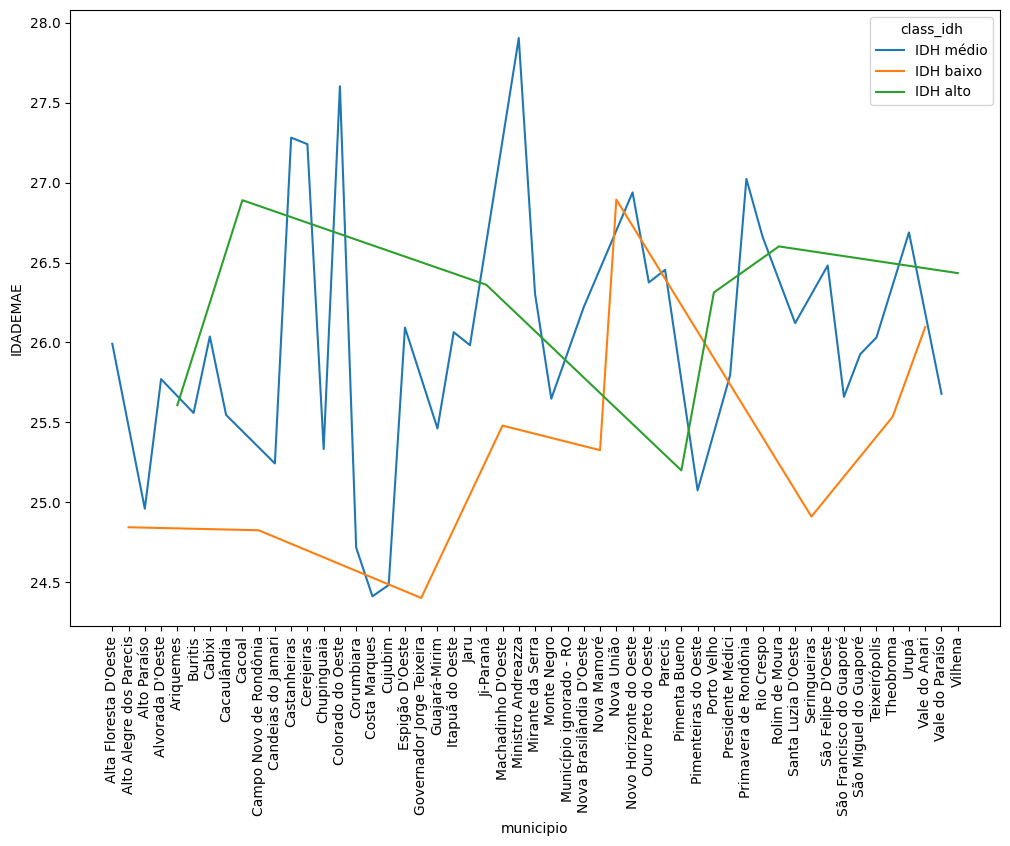

In [335]:
fig = sns.lineplot(data=sinasc_class, x='municipio', y='IDADEMAE', hue='class_idh')
fig.figure.set_size_inches(12, 8)
plt.xticks(rotation=90)

### Insight

- A média da idade das mães residentes em municíos com IDH baixo tende a ser menor.